# Exercizes on clustering

Here you can find a program to read a data file in csv format.

The data file is in CSV format and it has in the first row the names of the features (separated by comma).
    
For each remaining row there is a list of real numbers (commas separated) which are the feature values.   

In [1]:
import csv
import sys
from os.path import join

import numpy as np
import pandas as pd
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data
file_path="sample_data/"
file_name1="3-clusters.csv"
df1 = pd.read_csv(join(file_path, file_name1))
feature_names1=df1.columns.tolist()
dataset1 = df1.values
file_name2="dataset-DBSCAN.csv"
dataset2 = pd.read_csv(join(file_path, file_name2))
df2 = pd.read_csv(join(file_path, file_name2))
feature_names2=df2.columns.tolist()
dataset2 = df2.values
file_name3="CURE-complete.csv"
df3 = pd.read_csv(join(file_path, file_name3))
feature_names3=df3.columns.tolist()
dataset3 = df3.values

The following program plots the dataset n.1

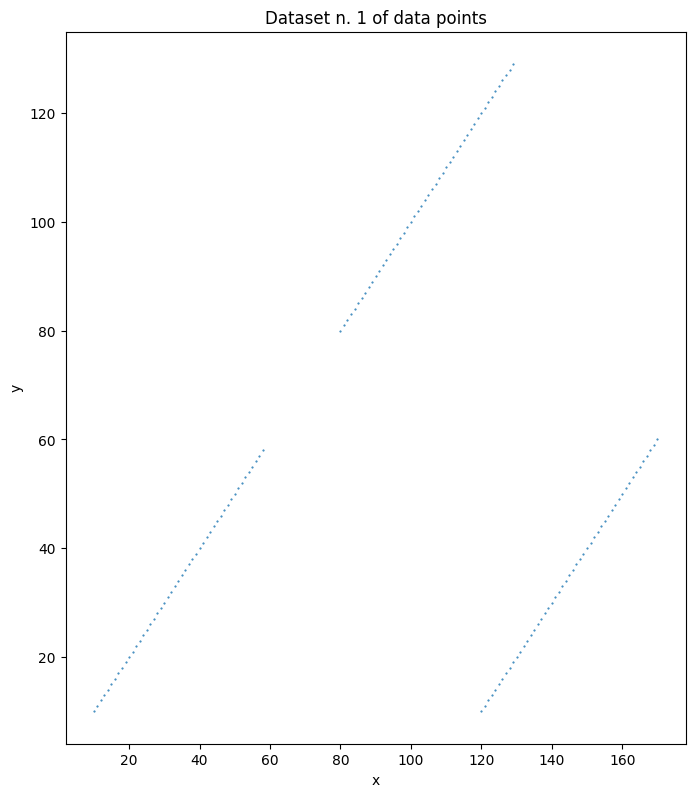

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(dataset1[:,0], dataset1[:,1], '.',markersize=1)
plt.show()

The following is the program for plotting the dataset n.2

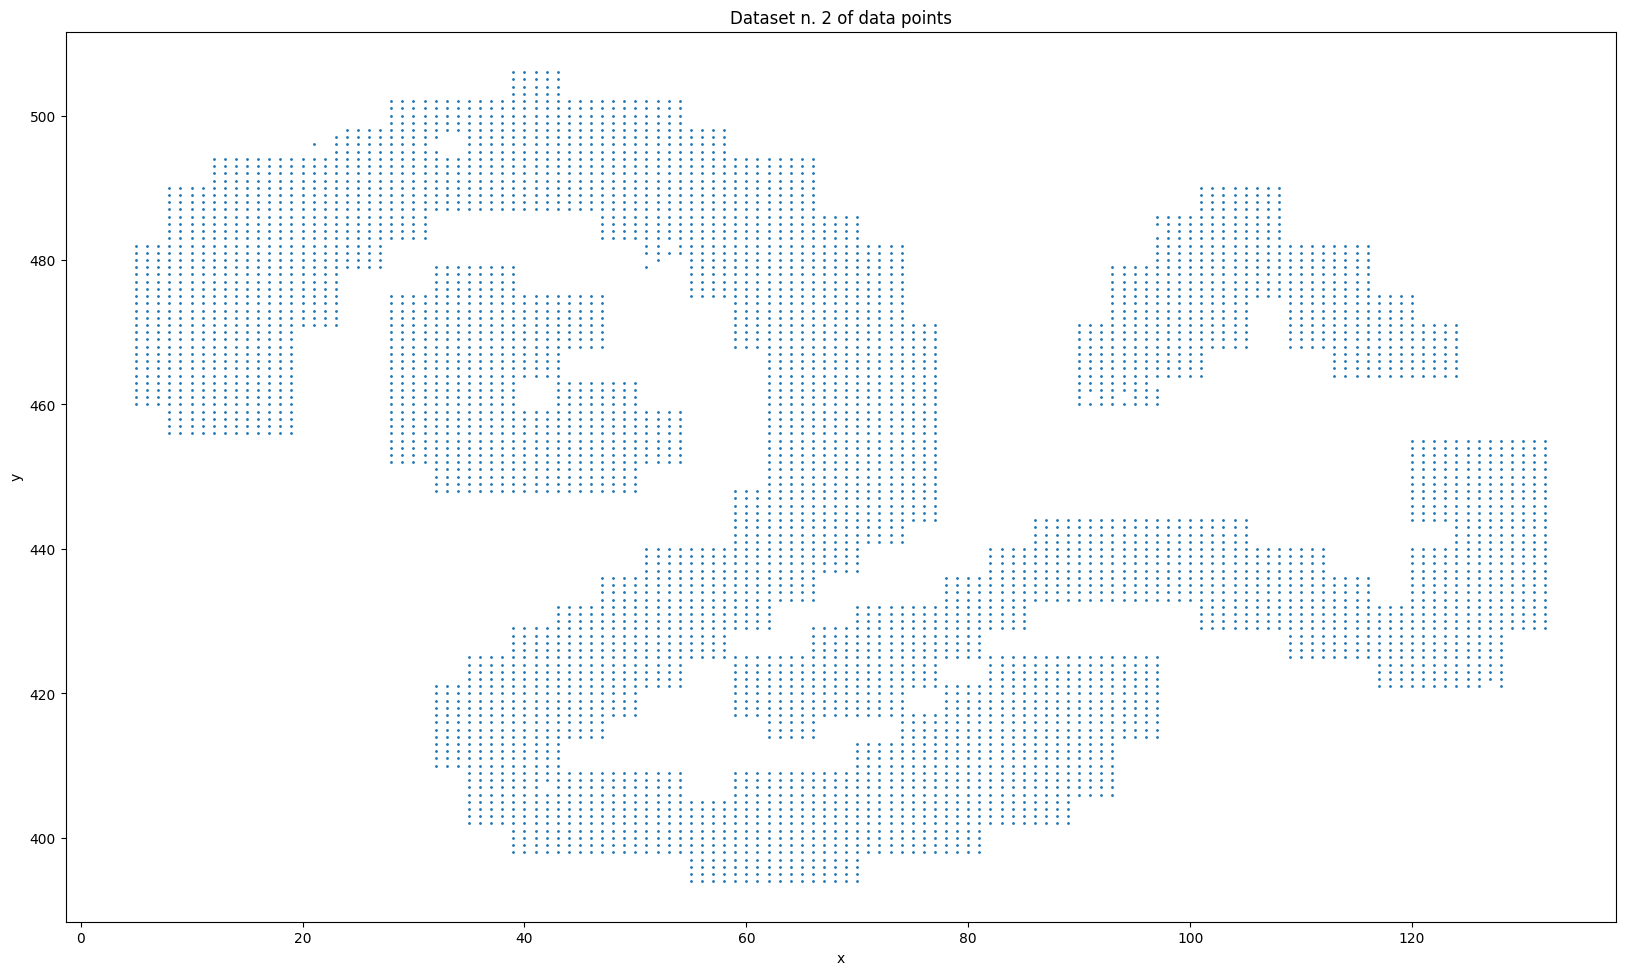

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(dataset2[:,0], dataset2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

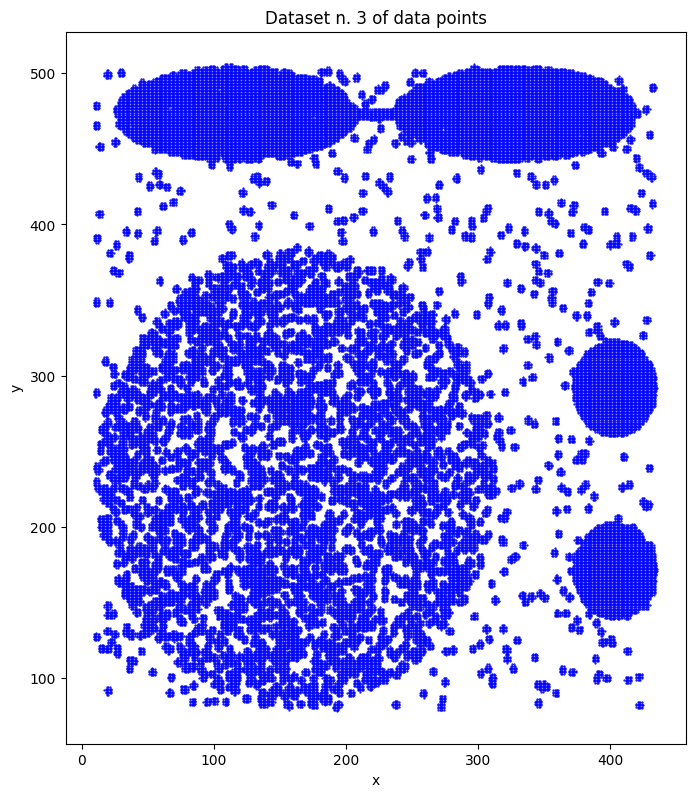

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(dataset3[:,0], dataset3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

## In the following program we cluster the dataset n.1 with K-means.
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3.

In [5]:
from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(dataset1)

i=0
nrighe_dataset1=dataset1.shape[0]

for i in range(nrighe_dataset1):
    print("Example n."+str(i)+"=("+str(dataset1[i,0])+","+str(dataset1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

Example n.0=(10,10)
in cluster n.1
Example n.1=(11,11)
in cluster n.1
Example n.2=(12,12)
in cluster n.1
Example n.3=(13,13)
in cluster n.1
Example n.4=(14,14)
in cluster n.1
Example n.5=(15,15)
in cluster n.1
Example n.6=(16,16)
in cluster n.1
Example n.7=(17,17)
in cluster n.1
Example n.8=(18,18)
in cluster n.1
Example n.9=(19,19)
in cluster n.1
Example n.10=(20,20)
in cluster n.1
Example n.11=(21,21)
in cluster n.1
Example n.12=(22,22)
in cluster n.1
Example n.13=(23,23)
in cluster n.1
Example n.14=(24,24)
in cluster n.1
Example n.15=(25,25)
in cluster n.1
Example n.16=(26,26)
in cluster n.1
Example n.17=(27,27)
in cluster n.1
Example n.18=(28,28)
in cluster n.1
Example n.19=(29,29)
in cluster n.1
Example n.20=(30,30)
in cluster n.1
Example n.21=(31,31)
in cluster n.1
Example n.22=(32,32)
in cluster n.1
Example n.23=(33,33)
in cluster n.1
Example n.24=(34,34)
in cluster n.1
Example n.25=(35,35)
in cluster n.1
Example n.26=(36,36)
in cluster n.1
Example n.27=(37,37)
in cluster n.1
Ex

We plot the clusters with a pandas data frame:

In [6]:
clustering_results_dataset1 = []

for i in range(nrighe_dataset1):

    clustering_results_dataset1.append({
        'Instance': i,
        feature_names1[0]: dataset1[i,0],
        feature_names1[1]: dataset1[i,1],
        'Cluster n.': kmeans1.labels_[i]
    })

results_df1 = pd.DataFrame(clustering_results_dataset1 )
print(results_df1.to_string(index=False, float_format='%.1f'))

 Instance   x   y  Cluster n.
        0  10  10           1
        1  11  11           1
        2  12  12           1
        3  13  13           1
        4  14  14           1
        5  15  15           1
        6  16  16           1
        7  17  17           1
        8  18  18           1
        9  19  19           1
       10  20  20           1
       11  21  21           1
       12  22  22           1
       13  23  23           1
       14  24  24           1
       15  25  25           1
       16  26  26           1
       17  27  27           1
       18  28  28           1
       19  29  29           1
       20  30  30           1
       21  31  31           1
       22  32  32           1
       23  33  33           1
       24  34  34           1
       25  35  35           1
       26  36  36           1
       27  37  37           1
       28  38  38           1
       29  39  39           1
       30  40  40           1
       31  41  41           1
       32 

In the following program we plot the clusters

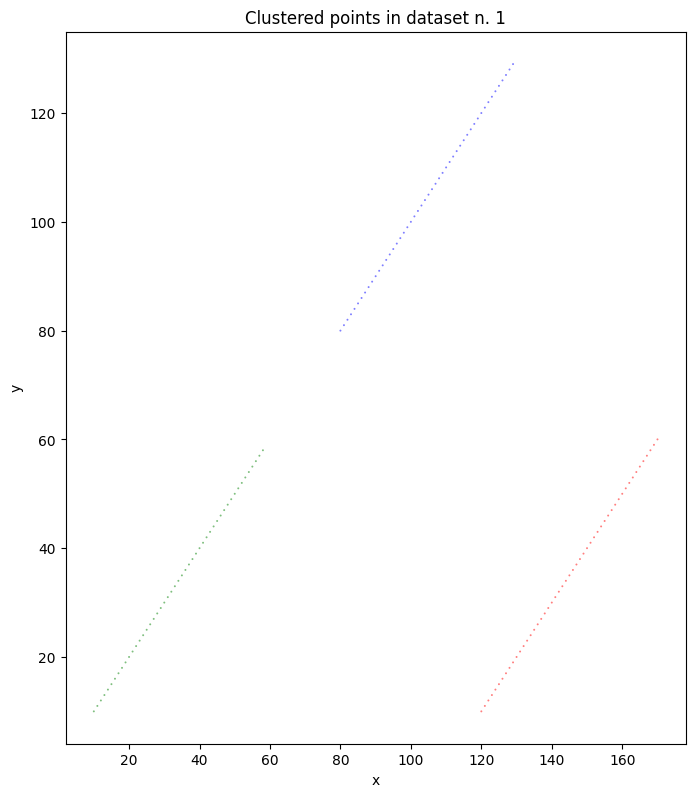

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']

#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [dataset1[i,0] for i in range(nrighe_dataset1) if kmeans1.labels_[i]==clu]
    data_list_y = [dataset1[i,1] for i in range(nrighe_dataset1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cell I propose you to perform clustering with K-means on dataset2.

In the following you have to plot clustering results on dataset2.

**Answer:**
how do you explain what it happens?

In the following cell I propose you to perform clustering with K-means on the dataset3.

In the following cell, I propose you to plot clustering results on dataset3.

**Answer:**
how do you explain what it happens?

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

Plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3.

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

In the following cell I propose you to:

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.